In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pingouin as pg
import scipy



Statistical Tests Overview
A statistical test is used to make a decision about a process.

The test is to find out if there is enough evidence to accept or reject a hypothesis about the process.


Hypothesis testing is a way of forming opinions or conclusions from the data we collected.

The data is used to choose between two choices, aka hypothesis or statements. In practical terms, the reasoning is done by comparing what we have observed to what we expected.

The available data will typically be a sample of the entire population.

There is a Null Hypothesis (H0), which consists of a statement about the sample data used. Typically it says there is no difference between groups.
An Alternative Hypothesis (H1) is typically the research question and states that there is difference between groups.

The Significance Level, or alfa, is the probability of rejecting the null hypothesis when it is true.

This means it is the percentage of risk we are happy to take while rejecting the null hypothesis.
This is a percentage that can be set by the researcher, however it is frequently set at 5%, meaning there is a 5 in 100 chance of rejecting the null hypothesis when it is in fact true.
However, depending on the topic you are researching (typically, high stakes), you may be more conservative and select a lower alfa level. For example, if you are testing a new drug that will cure cancer, you want to be very sure about your conclusions


A Statistical test works by measuring a test statistic, which is a number that explains how different the relationship between your variables in your test is.

The method to calculate a test statistic varies between tests, for example, the formula for a test with 2 samples is different from a test with 3 samples. The test statistic compares differences between the samples.

The p-value is considered as a tool for deciding whether to reject the null hypothesis.

In a simple definition, a p-value is the probability that the null hypothesis is true. The smaller p-value is, stronger evidence we have in favor of the alternative hypothesis. We will not focus on how it is calculated, like which statistics table are used, let's keep simple for the moment.

Once you have a p-value and alfa (or Significance level), you are in a position to make a statistical conclusion and interpret a statistical test.

If p-value is lower than alfa, you have enough evidence to reject the null hypothesis
If the p-value is not lower than alfa, you do not have enough evidence to reject the null hypothesis

The Shapiro-Wilk tests if a given data is normally distributed

The null hypothesis states that the population is normally distributed. The alternative hypothesis states that the population is not normally distributed
Thus, if the p-value is less than the chosen alpha level (typically set at 0.05), the null hypothesis is rejected, and there is evidence that the data tested is not normally distributed.
First, let's generate some data to illustrate the concepts over the lesson, using the libraries we learned so far

In [3]:
from scipy.stats import skewnorm
np.random.seed(seed=1)
size=200

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

,Normal,Positive Skewed,Negative Skewed,Exponential,Uniform,Bimodal,Multimodal,Poisson,Discrete
0,-2.613,0.987,-0.099,36.250,0.864,43.249,38.396,0,20
1,0.153,0.570,-2.485,16.062,0.448,38.776,43.296,1,17
2,0.734,1.093,-0.487,40.443,0.562,38.944,37.751,1,17


Let's visualize the data distribution using boxplot and histogram for all variables

We loop on each variable and create a figure with 2 plots, one boxplot and one histogram

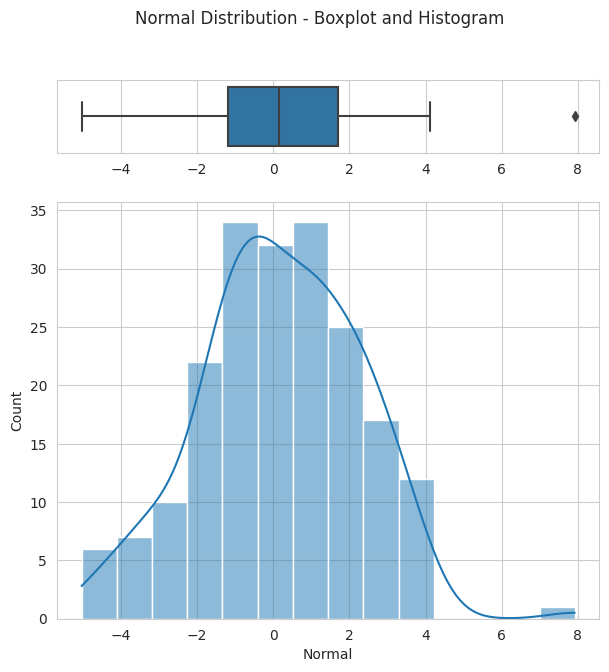

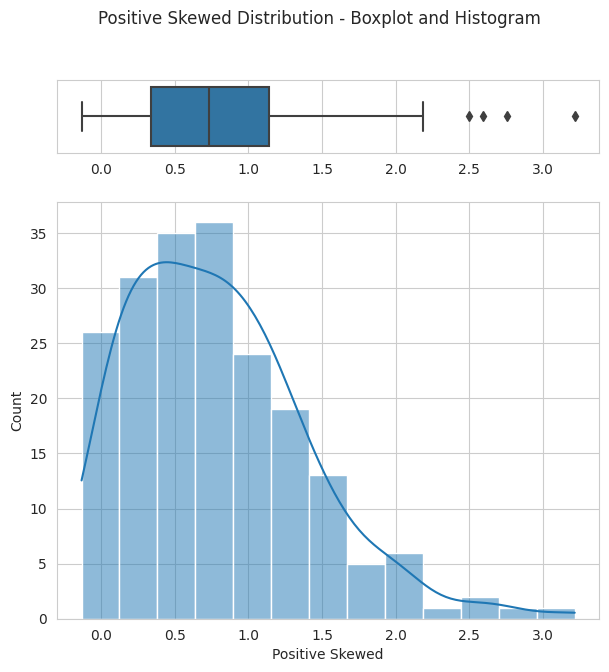

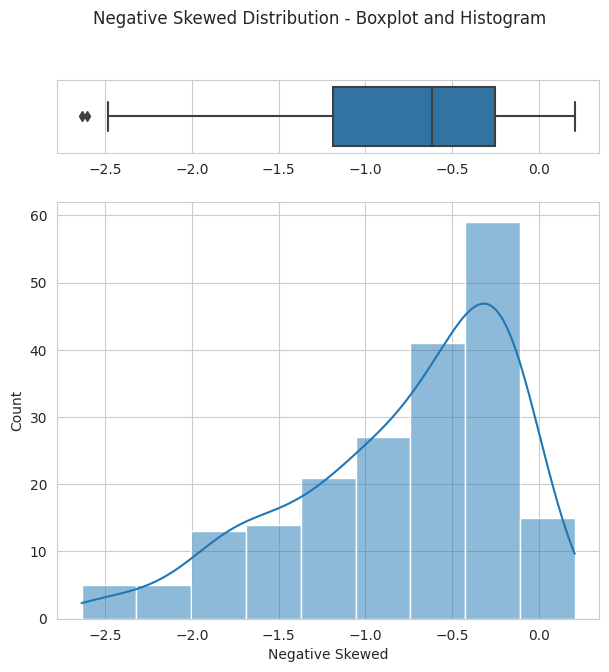

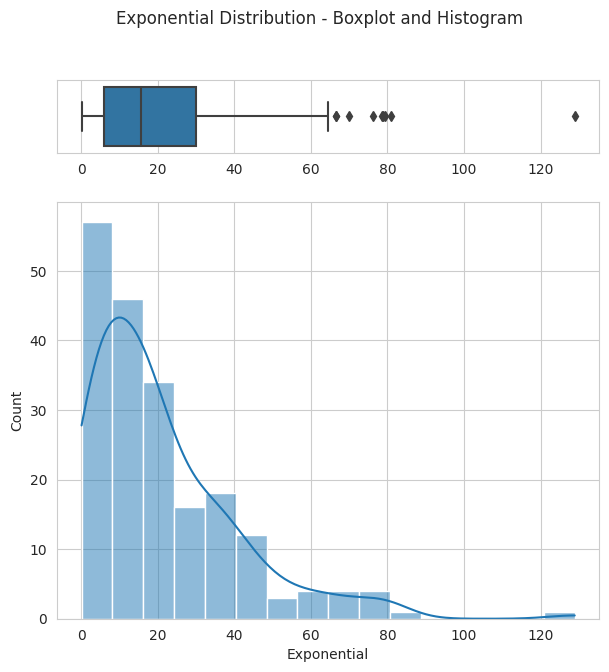

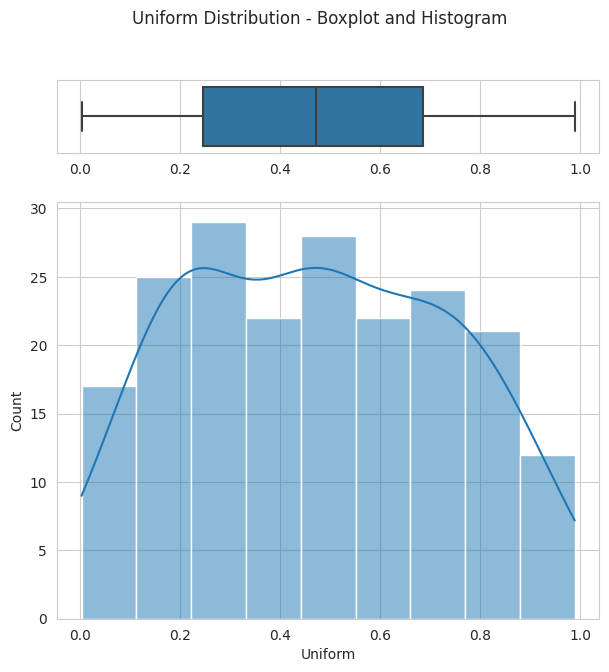

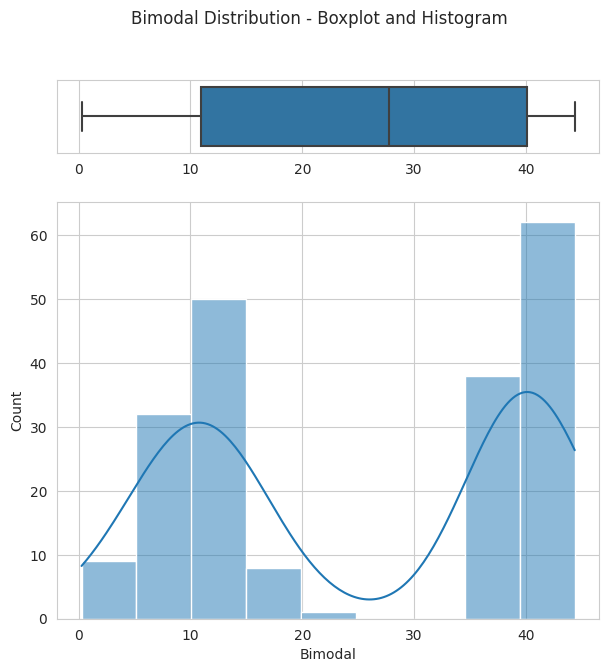

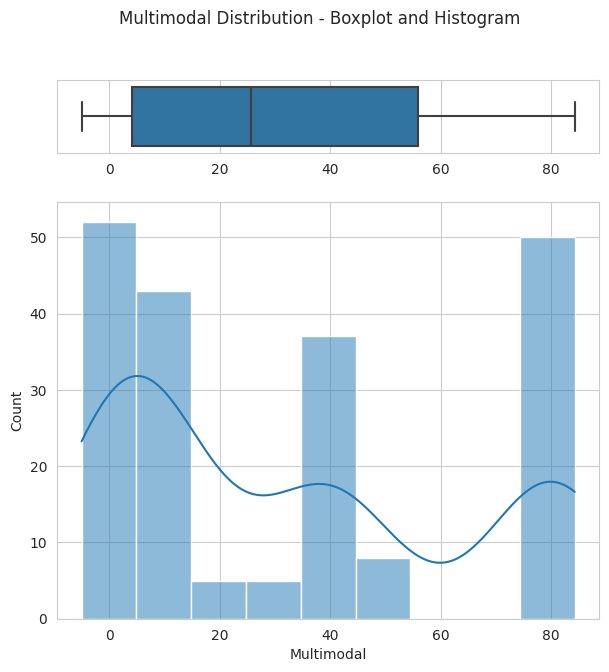

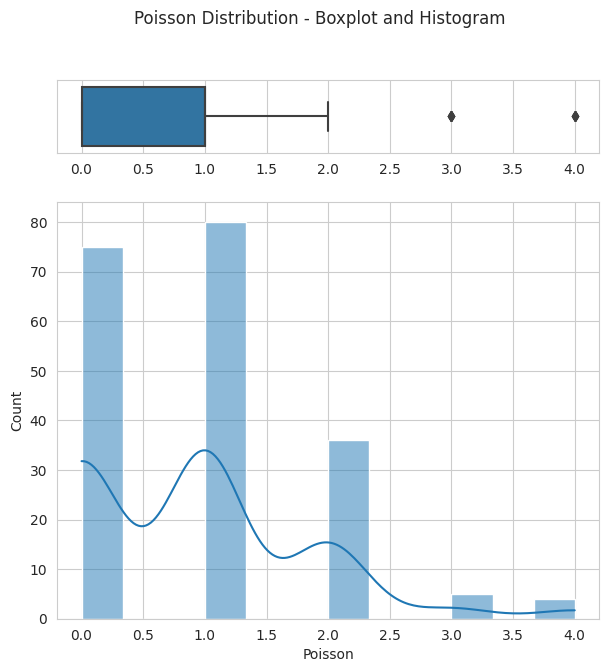

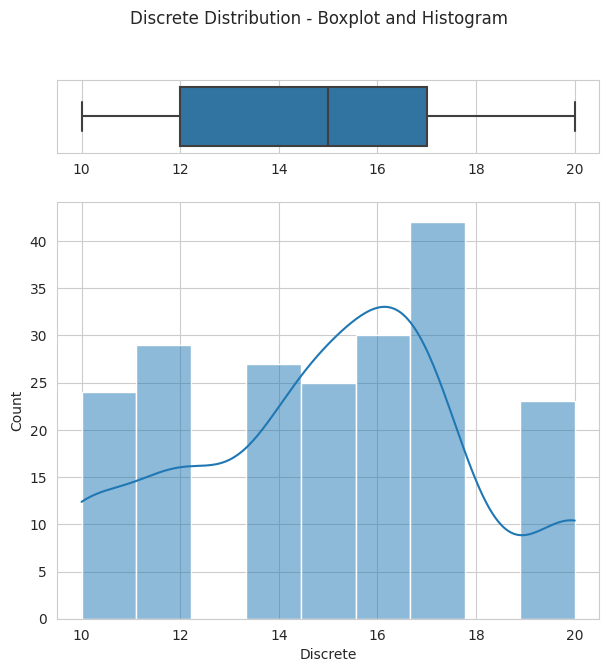

In [4]:
for col in df.columns:
  fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(data=df, x=col, ax=axes[0])
  axes[0].set_xlabel(" ")
  sns.histplot(data=df, x=col, kde=True, ax=axes[1])
  fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
  plt.show()
  print("\n\n")

We can test if all numerical columns in a DataFrame are normally distributed with pg.normality().The function documentation is here. The arguments we parse are: data, alpha=0.05 for the significance level

The output shows in the index each variable name, and at normal column the result if a given variable is normally distributed or not.

In [5]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
Normal,0.988676,1.138047e-01,True
Positive Skewed,0.942787,4.038199e-07,False
Negative Skewed,0.918364,4.423824e-09,False
Exponential,0.838932,1.286760e-13,False
Uniform,0.968244,1.724466e-04,False
Bimodal,0.790213,1.158750e-15,False
Multimodal,0.843654,2.137643e-13,False
Poisson,0.817142,1.403118e-14,False
Discrete,0.931505,4.455329e-08,False


In [6]:
df_pinguins = sns.load_dataset('penguins')
print(df_pinguins.shape)
df_pinguins.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


You can check if bill_length_mm (numerical variable) is normally distributed across species (categorical variable)

We add the dv (dependent variable) as bill_length_mm and group (grouping variable) as species
We note that only bill_length_mm in Gentoo species is not normally distributed

In [7]:
pg.normality(data=df_pinguins, dv='bill_length_mm', group='species', alpha=0.05)

,W,pval,normal
Adelie,0.993362,0.716661,True
Chinstrap,0.975250,0.194099,True
Gentoo,0.972722,0.013491,False


However, you will notice that bill_length_mm itself is not normally distributed

In [8]:
pg.normality(data=df_pinguins['bill_length_mm'], alpha=0.05)

,W,pval,normal
bill_length_mm,0.974855,0.000011,False


You can plot a histogram for bill_length_mm, and bill_length_mm per species to make sense of the distribution plot/shape and the shapiro results

bill_length_mm variable is not normally distributed
when you analyze bill_length_mm per species, Gentoo's bill_length_mm is not normally distributed
Note The visuals may mislead you, what matters is the result from the statistical test

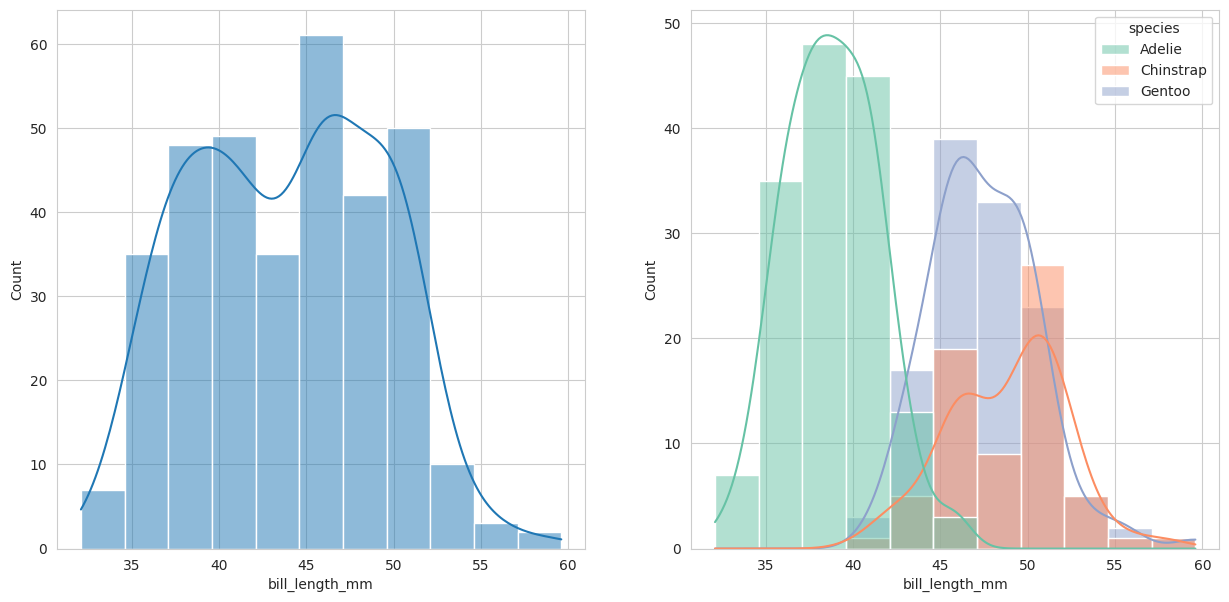

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
sns.histplot(data=df_pinguins, x='bill_length_mm', kde=True, ax=axes[0])
sns.histplot(data=df_pinguins, x='bill_length_mm',hue='species' , kde=True, palette='Set2', ax=axes[1])
plt.show();
print("\n\n")

Chi-Squared Test measures if there is a significant difference between the expected frequencies and the observed frequencies in categorical variables

Hypothesis
Null hypothesis – there is no difference in the frequency or the proportion of occurrences in each category
Alternate hypothesis - there is a difference in the frequency or proportion of occurrences in each category
Let's consider a builtin dataset from pingouin. It is a study on heart disease, where the target equals one, which indicates heart disease.

In [10]:
df = pg.read_dataset('chi2_independence')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's check target (heart disease) distribution with .value_counts()

In [11]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Let's take target and fbs (that looks to define fasting blood sugar)

We ask ourselves, is fbs a good predictor for the target (heart disease)? Is there any significant association between them?
Let's make a barplot to investigate fbs levels across different target levels

That shows the distribution of people that have/dont have heart disease and have/dont have fbs
It visually looks that the distribution of people with and without heart disease is similar to people with different fbs levels

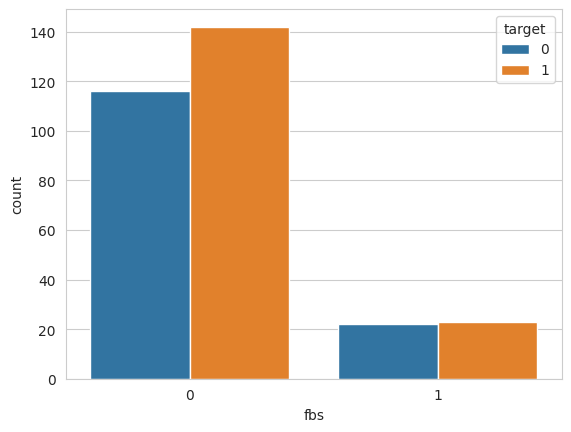

In [12]:
sns.countplot(x='fbs',hue='target',data=df)
plt.show()

We use pg.chi2_independence() to conduct Chi Square Test. The arguments we use are:

data, x and y as the variables for the chi squared test. y tends to be the target variable you are interested to analyze across a given feature (x)

In [14]:
expected, observed, stats = pg.chi2_independence(data=df, x='fbs', y='target')

In [15]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,0.106273,1.0,0.744428,0.018728,0.062261
1,cressie-read,0.666667,0.106201,1.0,0.744511,0.018722,0.062253
2,log-likelihood,0.000000,0.106069,1.0,0.744664,0.018710,0.062237
3,freeman-tukey,-0.500000,0.105979,1.0,0.744769,0.018702,0.062227
4,mod-log-likelihood,-1.000000,0.105897,1.0,0.744865,0.018695,0.062217
5,neyman,-2.000000,0.105755,1.0,0.745030,0.018682,0.062201


We are interested on the pval from pearson test.

We query from stats where test == pearson and grab pval

In [16]:
stats.query("test == 'pearson'")['pval']

0    0.744428
Name: pval, dtype: float64

We consider our significance level alpha = 0.05.

Since p-value (0.744428) is greater than alpha, we accept the null hypothesis.
Therefore there was not a significant association between fbs and target.
fbs is not indicating to be a good predictor for target

Now let's take target and sex

We ask ourselves, is sex a good predictor for target (heart disease)?
Is there any significant association between them?
Let's make a barplot to investigate sex levels across different target levels

It visually looks that no heart disease (target = 0) proportion in one sex is different than the other.

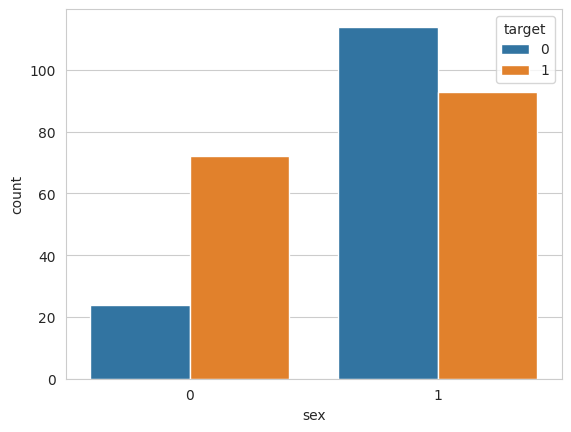

In [17]:
sns.countplot(data=df, x='sex', hue='target')
plt.show()

We conduct the Chi-Squared Test, where now x='sex'

In [18]:
expected, observed, stats = pg.chi2_independence(data=df, x='sex', y='target')

And extract p-value using the same rationale from previous exercise

In [19]:
stats.query("test == 'pearson'")['pval']

0    0.000002
Name: pval, dtype: float64

We consider our significance level alpha = 0.05.

Since pvalue (0.000002) is smaller than alpha, we reject the null hypothesis.

Therefore there was significant association between sex and target.

sex is indicating to be a good predictor for target (heart disease)